## Importing required packages 

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import requests

## Getting and Understanding Data

In [2]:
#Getting data
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1");
rounds2= pd.read_csv("rounds2.csv", encoding = "ISO-8859-1");
#Decoding to clean the data
companies["permalink"]=companies["permalink"].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'));
rounds2["company_permalink"]=rounds2["company_permalink"].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'));

In [3]:
#Understanding the structure of the datasets
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
#Understanding the structure of the datasets
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [5]:
#Finding number of unique companies in companies.txt and rounds2.csv
unique_companies=set(companies["permalink"].str.lower());
unique_rounds2=set(rounds2["company_permalink"].str.lower());
print("Number of companies in companies.txt:",len(unique_companies));
print("Number of companies in rounds2.csv:",len(unique_rounds2));

Number of companies in companies.txt: 66368
Number of companies in rounds2.csv: 66368


In [6]:

#Finding if any companies in companies.txt not in rounds2.csv and viceversa
print("Companies in companies.txt and not in rounds2.csv:",unique_companies-unique_rounds2);
print("Companies in rounds2.csv and not in companies.txt:",unique_rounds2-unique_companies);

Companies in companies.txt and not in rounds2.csv: set()
Companies in rounds2.csv and not in companies.txt: set()


In [7]:
#Merging the two dataframes
companies["permalink"]=companies["permalink"].str.lower();
rounds2["company_permalink"]=rounds2["company_permalink"].str.lower();
master_frame=pd.merge(left=rounds2,right=companies,left_on='company_permalink',right_on='permalink',how='left');
print("Length of merged Master frame:",len(master_frame));

Length of merged Master frame: 114949


In [8]:
#Understanding the structure of merged dataset
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


## Data Cleaning

In [9]:
#Cleaning Data
#Checking number of null values in each column
master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [10]:
#Checking the null values percentage for each column
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64


In [11]:
#Dropping columns that are unncessary / irrelevant to given scenario having more null values
master_frame=master_frame.drop(columns=['funding_round_code','funding_round_permalink','funded_at','permalink','homepage_url','state_code','region','city','founded_at']);
##Checking the null values percentage for each column
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
status                 0.00
country_code           7.55
dtype: float64


In [12]:
#Dropping rows having  null values in 'raised_amount_usd','country_code','category_list' since these are the vital columns for the given scenario
master_frame=master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() | master_frame['category_list'].isnull())]
#Deleting companies with operational status as closed
master_frame=master_frame[~(master_frame['status'].str.lower()=='closed')]
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
status                0.0
country_code          0.0
dtype: float64


In [13]:
#Understanding the data
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN
6,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,operating,HKG
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN


## Finding Average value of investments for each Funding Type

In [14]:
#Finding Average value of investments for each Funding Type
#Grouping by Funding type
master_frame['raised_amount_usd']=master_frame['raised_amount_usd']/1000000; #Converting it into millions of USD
masterframe_grouped=master_frame.groupby('funding_round_type',as_index=False).mean().sort_values("raised_amount_usd",ascending=False);
masterframe_grouped

,funding_round_type,raised_amount_usd
6,post_ipo_debt,175.469724
10,secondary_market,94.089405
8,private_equity,75.976019
7,post_ipo_equity,67.163587
2,debt_financing,17.868009
12,undisclosed,16.049107
13,venture,11.893957
4,grant,4.283535
9,product_crowdfunding,1.376774
1,convertible_note,1.343502


## Choosing the investment type based on given range

In [15]:
#Applying filter condition of investment amount between 5 to 15 million USD
df1=masterframe_grouped[masterframe_grouped["raised_amount_usd"].between(5, 15, inclusive = True)]
df1

,funding_round_type,raised_amount_usd
13,venture,11.893957


In [16]:
#Choosing the investment type
investment_type=df1['funding_round_type'].to_string(index=False);
print("\n Grouped dataframe on Funding type and applying filter: \n",df1);
print("\n Chosen investment type:",investment_type);


 Grouped dataframe on Funding type and applying filter: 
    funding_round_type  raised_amount_usd
13            venture          11.893957

 Chosen investment type:  venture


## Filtering the data with only the selected investment type

In [17]:
#Filtering only the selected investment type
masterframe_venture=master_frame[master_frame['funding_round_type']=='venture'];
masterframe_venture.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,operating,IND
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,venture,20.000000,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,venture,1.700000,H2O.ai,Analytics,operating,USA


## Finding top9 countries based on invested amount on selected investment type - Venture

In [18]:
#Dataframe of top9 countries based on invested amount on selected investment type
top9=masterframe_venture.groupby('country_code',as_index=False).sum().sort_values("raised_amount_usd",ascending=False).head(9);
top9

,country_code,raised_amount_usd
94,USA,398324.586390
15,CHN,38642.273502
29,GBR,18142.285645
39,IND,13920.253718
12,CAN,8747.167598
28,FRA,6742.608637
42,ISR,6484.356814
21,DEU,6021.103078
45,JPN,3156.202471


## Finding the top3 English Speaking Countries

In [19]:
# Using Beautiful Soup to extract country codes of those countries where English is the official language
source_code = requests.get('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language')
soup = BeautifulSoup(source_code.content,features="lxml")
table1 = soup.find_all('table')[0]
df = pd.read_html(str(table1))[0]
country_code_1 = df["Alpha-3 code"].tolist()
table2 = soup.find_all('table')[1]
df = pd.read_html(str(table2))[0]
country_code_2 = df["Alpha-3 code"].tolist()
country_code=list(set(country_code_1+country_code_2))
# Filtering top 3 English speaking countries from top 9
top_english_speaking=top9[top9['country_code'].isin(country_code)].sort_values(by='raised_amount_usd',ascending=False)
top3=top_english_speaking['country_code'][0:3].to_list()
top3

['USA', 'GBR', 'IND']

## Sector Analysis

In [20]:
#Sector Analysis
#Extracting the primary category
master_frame_old=master_frame
master_frame=masterframe_venture
master_frame["primary_category"]=master_frame['category_list'].apply(lambda x:str(x).split("|")[0].title());
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category
0,/organization/-fame,venture,10.000000,#fame,Media,operating,IND,Media
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,operating,CHN,Curated Web
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology
10,/organization/0xdata,venture,20.000000,H2O.ai,Analytics,operating,USA,Analytics
11,/organization/0xdata,venture,1.700000,H2O.ai,Analytics,operating,USA,Analytics


In [21]:
#Loading the mapping file as a dataframe
mapping_frame=pd.read_csv("C:\\Users\karth\Desktop\Datascience\Assignment_1_SparkFunds\\mapping.csv",header=0);
mapping_frame.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [22]:
#Mapping primary category to main category according to mapping file
mapping_frame["category_list"]=mapping_frame["category_list"].apply(lambda x:str(x).replace('0','na').title());
mapping_frame = pd.melt(mapping_frame,id_vars=["category_list"])
mapping_frame = mapping_frame[mapping_frame.value != 0]
mapping_frame = mapping_frame.drop('value', axis=1)
mapping_frame.rename(columns={'variable':'main_category','category_list':'primary_category'}, inplace=True)
master_frame=pd.merge(left=master_frame,right=mapping_frame, left_on='primary_category',right_on='primary_category',how='left')
master_frame=master_frame.rename(columns={'main_category_x':'main_category'})
master_frame=master_frame[~(master_frame['main_category'].isnull())]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44732 entries, 0 to 44747
Data columns (total 9 columns):
company_permalink     44732 non-null object
funding_round_type    44732 non-null object
raised_amount_usd     44732 non-null float64
name                  44732 non-null object
category_list         44732 non-null object
status                44732 non-null object
country_code          44732 non-null object
primary_category      44732 non-null object
main_category         44732 non-null object
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [23]:
#Understanding mapped dataset
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category
0,/organization/-fame,venture,10.000000,#fame,Media,operating,IND,Media,Entertainment
1,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,operating,CHN,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,venture,20.000000,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,venture,1.700000,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"


## Separating data of top 3 English Speaking countries investing on type 'Venture' 
## in the range 5-15 million USD

In [24]:
#Creating separate dataframes for the top3 english speaking countries for chosen investment type and investment range
#Country 1 : USA Funding Type:Venture
df_country1=master_frame.loc[master_frame['country_code']==top3[0]]
# Removing rows where 'raised amount' is in the range 5-15 million USD
df_country1=df_country1[~np.isnan(df_country1['raised_amount_usd'])].loc[df_country1["raised_amount_usd"].between(5, 15, inclusive = True)]
df_country1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category
5,/organization/0xdata,venture,8.900000,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,venture,5.000000,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,"News, Search and Messaging"
28,/organization/128-technology,venture,11.999347,128 Technology,Service Providers|Technology,operating,USA,Service Providers,Others
32,/organization/1366-technologies,venture,15.000000,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing
33,/organization/1366-technologies,venture,5.000000,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing


In [25]:
#Creating separate dataframes for the top3 english speaking countries for chosen investment type and investment range
#Country 2 : GBR Funding Type:Venture
df_country2=master_frame.loc[master_frame['country_code']==top3[1]]
# Removing rows where 'raised amount' is in the range 5-15 million USD
df_country2=df_country2[~np.isnan(df_country2['raised_amount_usd'])].loc[df_country2["raised_amount_usd"].between(5, 15, inclusive = True)]
df_country2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category
146,/organization/365scores,venture,5.500000,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,Android,"Social, Finance, Analytics, Advertising"
324,/organization/7digital,venture,8.468328,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment
325,/organization/7digital,venture,10.000000,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment
349,/organization/90min,venture,15.000000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
350,/organization/90min,venture,5.800000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment


In [26]:
#Creating separate dataframes for the top3 english speaking countries for chosen investment type and investment range
#Country 3 : IND Funding Type:Venture
df_country3=master_frame.loc[master_frame['country_code']==top3[2]]
# Removing rows where 'raised amount' is in the range 5-15 million USD
df_country3=df_country3[~np.isnan(df_country3['raised_amount_usd'])].loc[df_country3["raised_amount_usd"].between(5, 15, inclusive = True)]
df_country3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category
0,/organization/-fame,venture,10.000000,#fame,Media,operating,IND,Media,Entertainment
74,/organization/21diamonds-india,venture,6.369507,21Diamonds,E-Commerce,operating,IND,E-Commerce,Others
381,/organization/a-little-world,venture,6.410000,A LITTLE WORLD,Finance,operating,IND,Finance,"Social, Finance, Analytics, Advertising"
1094,/organization/adlabs-imagica,venture,8.180000,Adlabs Imagica,Entertainment|Tourism,operating,IND,Entertainment,Entertainment
1494,/organization/agile,venture,5.740000,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,Finance,"Social, Finance, Analytics, Advertising"


## Finding Number of Investments and Total Amount invested based on 'main_category'

In [27]:
#Counting number of investments based on main_category and making it as a separate column
df_country1['count']=df_country1.groupby('main_category')['raised_amount_usd'].transform('count');
df_country1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category,count
5,/organization/0xdata,venture,8.900000,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",2590
6,/organization/1-mainstream,venture,5.000000,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,"News, Search and Messaging",1465
28,/organization/128-technology,venture,11.999347,128 Technology,Service Providers|Technology,operating,USA,Service Providers,Others,2758
32,/organization/1366-technologies,venture,15.000000,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing,739
33,/organization/1366-technologies,venture,5.000000,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing,739


In [28]:
#Counting number of investments based on main_category and making it as a separate column
df_country2['count']=df_country2.groupby('main_category')['raised_amount_usd'].transform('count');
df_country2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category,count
146,/organization/365scores,venture,5.500000,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,Android,"Social, Finance, Analytics, Advertising",128
324,/organization/7digital,venture,8.468328,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment,53
325,/organization/7digital,venture,10.000000,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment,53
349,/organization/90min,venture,15.000000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment,53
350,/organization/90min,venture,5.800000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment,53


In [29]:
#Counting number of investments based on main_category and making it as a separate column
df_country3['count']=df_country3.groupby('main_category')['raised_amount_usd'].transform('count');
df_country3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category,count
0,/organization/-fame,venture,10.000000,#fame,Media,operating,IND,Media,Entertainment,32
74,/organization/21diamonds-india,venture,6.369507,21Diamonds,E-Commerce,operating,IND,E-Commerce,Others,103
381,/organization/a-little-world,venture,6.410000,A LITTLE WORLD,Finance,operating,IND,Finance,"Social, Finance, Analytics, Advertising",59
1094,/organization/adlabs-imagica,venture,8.180000,Adlabs Imagica,Entertainment|Tourism,operating,IND,Entertainment,Entertainment,32
1494,/organization/agile,venture,5.740000,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,Finance,"Social, Finance, Analytics, Advertising",59


In [30]:
#Total Amount invested in each main_sector is made as a separate column
#Country 1 :USA
df_country1['total_amount_invested']=df_country1.groupby('main_category')['raised_amount_usd'].transform('sum');
df_country1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category,count,total_amount_invested
5,/organization/0xdata,venture,8.900000,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",2590,22830.769582
6,/organization/1-mainstream,venture,5.000000,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,"News, Search and Messaging",1465,12988.908525
28,/organization/128-technology,venture,11.999347,128 Technology,Service Providers|Technology,operating,USA,Service Providers,Others,2758,24636.698580
32,/organization/1366-technologies,venture,15.000000,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing,739,6700.079468
33,/organization/1366-technologies,venture,5.000000,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing,739,6700.079468


In [31]:
#Total Amount invested in each main_sector is made as a separate column
# Country 2: GBR
df_country2['total_amount_invested']=df_country2.groupby('main_category')['raised_amount_usd'].transform('sum');
df_country2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category,count,total_amount_invested
146,/organization/365scores,venture,5.500000,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,Android,"Social, Finance, Analytics, Advertising",128,1054.628102
324,/organization/7digital,venture,8.468328,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment,53,463.514687
325,/organization/7digital,venture,10.000000,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment,53,463.514687
349,/organization/90min,venture,15.000000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment,53,463.514687
350,/organization/90min,venture,5.800000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment,53,463.514687


In [32]:
#Total Amount invested in each main_sector is made as a separate column
#Country 3: IND
df_country3['total_amount_invested']=df_country3.groupby('main_category')['raised_amount_usd'].transform('sum');
df_country3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category,main_category,count,total_amount_invested
0,/organization/-fame,venture,10.000000,#fame,Media,operating,IND,Media,Entertainment,32,272.080000
74,/organization/21diamonds-india,venture,6.369507,21Diamonds,E-Commerce,operating,IND,E-Commerce,Others,103,940.289507
381,/organization/a-little-world,venture,6.410000,A LITTLE WORLD,Finance,operating,IND,Finance,"Social, Finance, Analytics, Advertising",59,535.549550
1094,/organization/adlabs-imagica,venture,8.180000,Adlabs Imagica,Entertainment|Tourism,operating,IND,Entertainment,Entertainment,32,272.080000
1494,/organization/agile,venture,5.740000,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,Finance,"Social, Finance, Analytics, Advertising",59,535.549550


## Total Number of Investments in USA

In [33]:
#Total Number of Investments
#Country 1: USA
df_country1['raised_amount_usd'].count()

11286

## Total Number of Investments in GBR

In [34]:
#Total Number of Investments
#Country 2: GBR
df_country2['raised_amount_usd'].count()

582

## Total Number of Investments in IND

In [35]:
#Total Number of Investments
#Country 3: IND
df_country3['raised_amount_usd'].count()

315

## Total Amount of Investment in USA

In [36]:
#Total Amount of Investment
#Country 1: USA
df_country1['raised_amount_usd'].sum()

101000.66677899999

## Total Amount of Investment in GBR

In [37]:
#Total Amount of Investment
#Country 2: GBR
df_country2['raised_amount_usd'].sum()

5053.293406000001

## Total Amount of Investment in IND

In [38]:
#Total Amount of Investment
#Country 3: IND
df_country3['raised_amount_usd'].sum()

2820.673602

## Finding top 3 investment sectors in each country and their corresponding number of investments

## Top 3 investment sectors in USA

In [39]:
#Finding top 3 investment sectors in each country and their corresponding number of investments
#Country 1: USA
df_country1.groupby('main_category',as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False).head(3)


,main_category,raised_amount_usd
6,Others,2758
7,"Social, Finance, Analytics, Advertising",2590
1,Cleantech / Semiconductors,2192


## Top 3 investment sectors in GBR

In [40]:
#Finding top 3 investment sectors in each country and their corresponding number of investments
#Country 2: GBR
df_country2.groupby('main_category',as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False).head(3)

,main_category,raised_amount_usd
6,Others,140
7,"Social, Finance, Analytics, Advertising",128
1,Cleantech / Semiconductors,116


## Top 3 investment sectors in IND

In [41]:
#Finding top 3 investment sectors in each country and their corresponding number of investments
#Country 3: IND
df_country3.groupby('main_category',as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False).head(3)

,main_category,raised_amount_usd
6,Others,103
7,"Social, Finance, Analytics, Advertising",59
5,"News, Search and Messaging",49


## Finding Most Invested Company in top 2 sectors in each country

## Most Invested Company in USA in top Sector

In [42]:
#Most Invested Company in USA in top Sector 'Others'
df_country1[df_country1["main_category"]=='Others'].groupby(['main_category','company_permalink']).sum().sort_values('raised_amount_usd',ascending=False).head(1)

,,raised_amount_usd,count,total_amount_invested
main_category,company_permalink,,,
Others,/organization/virtustream,64.3,16548,147820.19148


## Most Invested Company in GBR in top Sector 

In [43]:
# Most Invested Company in GBR in top Sector 'Others'
df_country2[df_country2["main_category"]=='Others'].groupby(['main_category','company_permalink']).sum().sort_values('raised_amount_usd',ascending=False).head(1)


,,raised_amount_usd,count,total_amount_invested
main_category,company_permalink,,,
Others,/organization/electric-cloud,37.0,560,4861.76896


## Most Invested Company in IND in top Sector 

In [44]:
# Most Invested Company in IND in top Sector 'Others'
df_country3[df_country3["main_category"]=='Others'].groupby(['main_category','company_permalink']).sum().sort_values('raised_amount_usd',ascending=False).head(1)

,,raised_amount_usd,count,total_amount_invested
main_category,company_permalink,,,
Others,/organization/firstcry-com,39.0,309,2820.868521


## Most Invested Company in USA in 2nd top Sector 

In [45]:
# Most Invested Company in USA in 2nd top Sector 'Social, Finance, Analytics, Advertising'
df_country1[df_country1["main_category"]=='Social, Finance, Analytics, Advertising'].groupby(['main_category','company_permalink']).sum().sort_values('raised_amount_usd',ascending=False).head(1)

,,raised_amount_usd,count,total_amount_invested
main_category,company_permalink,,,
"Social, Finance, Analytics, Advertising",/organization/shotspotter,67.933006,18130,159815.387074


## Most Invested Company in GBR in 2nd top Sector

In [46]:
# Most Invested Company in GBR in 2nd top Sector 'Social, Finance, Analytics, Advertising'
df_country2[df_country2["main_category"]=='Social, Finance, Analytics, Advertising'].groupby(['main_category','company_permalink']).sum().sort_values('raised_amount_usd',ascending=False).head(1)

,,raised_amount_usd,count,total_amount_invested
main_category,company_permalink,,,
"Social, Finance, Analytics, Advertising",/organization/celltick-technologies,37.5,512,4218.512408


## Most Invested Company in IND in 2nd top Sector

In [47]:
# Most Invested Company in IND in 2nd top Sector 'Social, Finance, Analytics, Advertising'
df_country3[df_country3["main_category"]=='Social, Finance, Analytics, Advertising'].groupby(['main_category','company_permalink']).sum().sort_values('raised_amount_usd',ascending=False).head(1)

,,raised_amount_usd,count,total_amount_invested
main_category,company_permalink,,,
"Social, Finance, Analytics, Advertising",/organization/manthan-systems,50.7,236,2142.1982


## Plots for Data Anaysis

## Plot showing each funding type's share

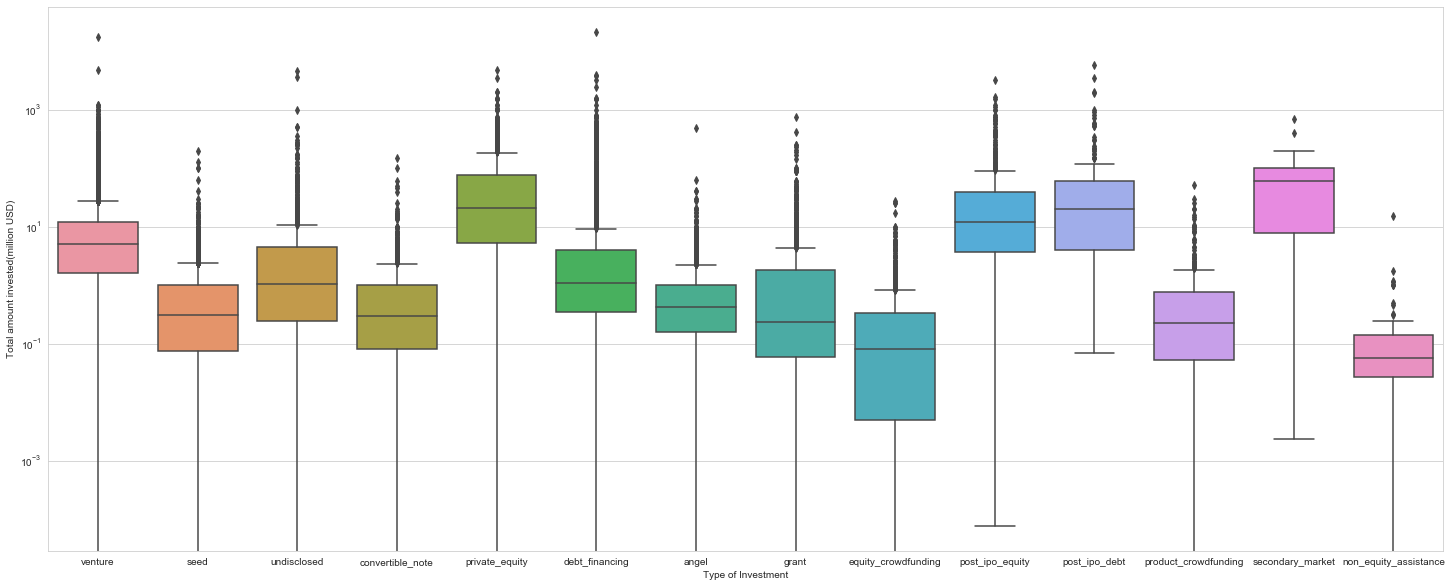

In [49]:
#Plots
#Plot 1: Plot showing each funding type's share
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set_style("whitegrid")
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_old)
plt.xlabel("Type of Investment")
plt.ylabel("Total amount invested(million USD)");
plt.xlabel("Type of Investment")
plt.yscale('log')
plt.show()

## Plot showing Average amount of investments of venture, seed, private_equity

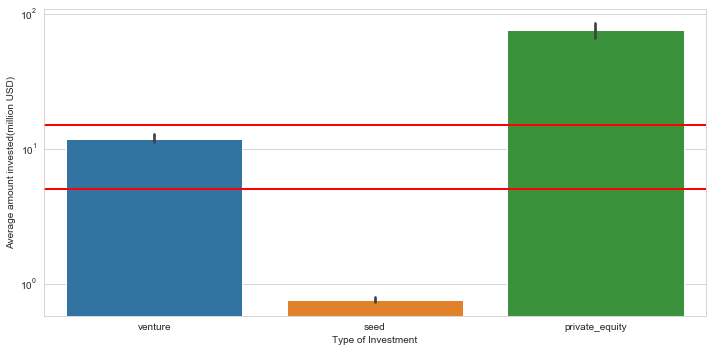

In [50]:
#Plot 2: Average amount of investments of venture, seed, private_equity
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
df_plot=master_frame_old[master_frame_old['funding_round_type'].isin(['venture','seed','private_equity'])];
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=df_plot,estimator=np.mean);
plt.axhline(y=5, linewidth=2, color = 'red')
plt.axhline(y=15, linewidth=2, color = 'red')
plt.ylabel("Average amount invested(million USD)");
plt.xlabel("Type of Investment")
plt.yscale('log')
plt.tight_layout()
plt.show()


## Plot showing Number of investments for each funding type

### This plot clearly shows that the most popular investment type is 'Venture'

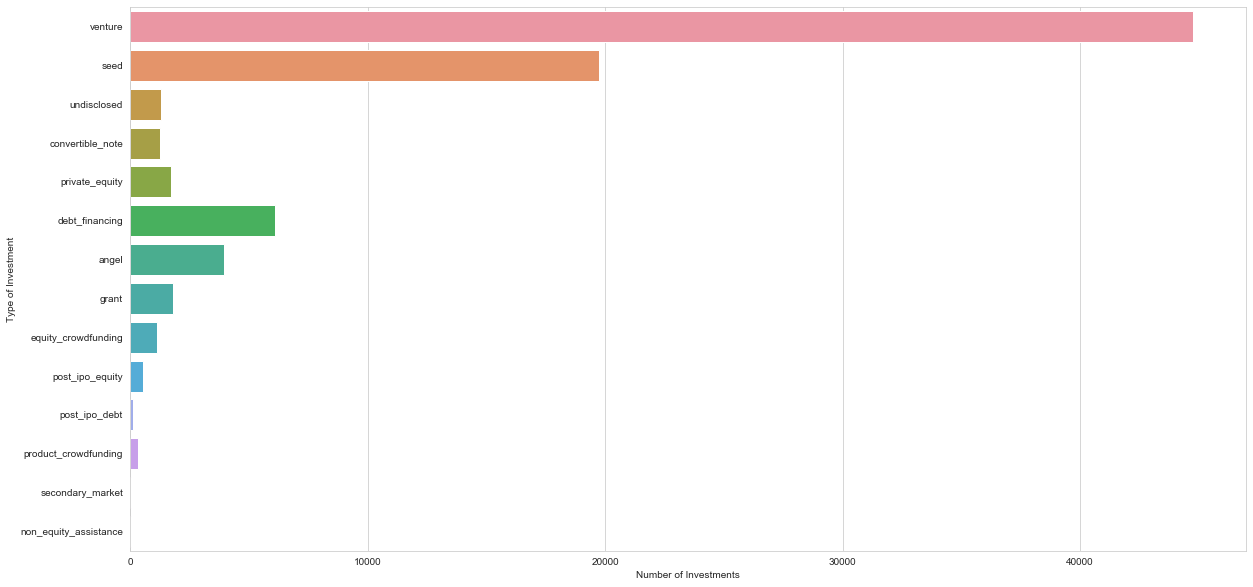

In [51]:
#Plot 3: Number of investments for each funding type -- Clearly tells 'venture'- the most popular type
plt.figure(figsize=(20, 10))
sns.countplot(y="funding_round_type", data=master_frame_old)
plt.xlabel("Number of Investments");
plt.ylabel("Type of Investment")
plt.show()

## Plot showing total amount of investment in top 9 countries

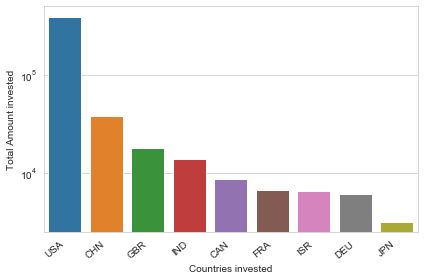

In [52]:
#Plot 4: Plot of total amount of investment -countrywise - top 9 countries
bp=sns.barplot(x='country_code', y='raised_amount_usd', data=top9);
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.ylabel("Total Amount invested");
plt.xlabel("Countries invested");
plt.yscale('log');
plt.tight_layout()
plt.show();

## Plot showing Count and Average of Investments for venture, seed, private_equity

### This plot clearly shows that 'Venture' type is not only popular but also lies within the given range 

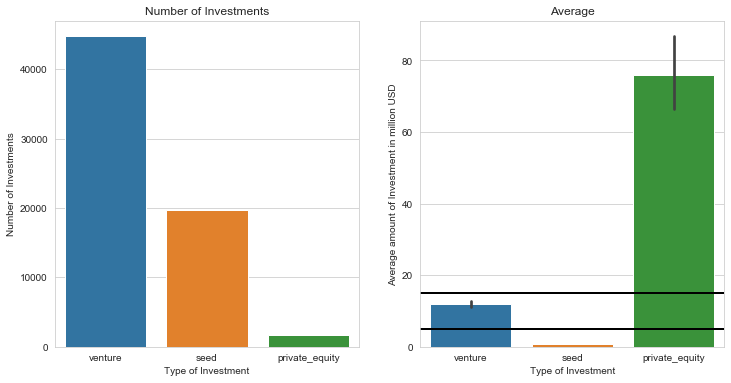

In [53]:
#Plot 5: Number of investments and Average of investment amount for the funding types --venture, seed, private_equity
#Black lines show the investment range specified
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=df_plot)
plt.title("Number of Investments")
plt.ylabel("Number of Investments");
plt.xlabel("Type of Investment");
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=df_plot, estimator=np.mean)
plt.title("Average")
plt.ylabel("Average amount of Investment in million USD");
plt.xlabel("Type of Investment");
plt.axhline(y=5, linewidth=2, color = 'k')
plt.axhline(y=15, linewidth=2, color = 'k')
plt.show()

## Plot showing top 3 investment sectors in top 3 English speaking countries

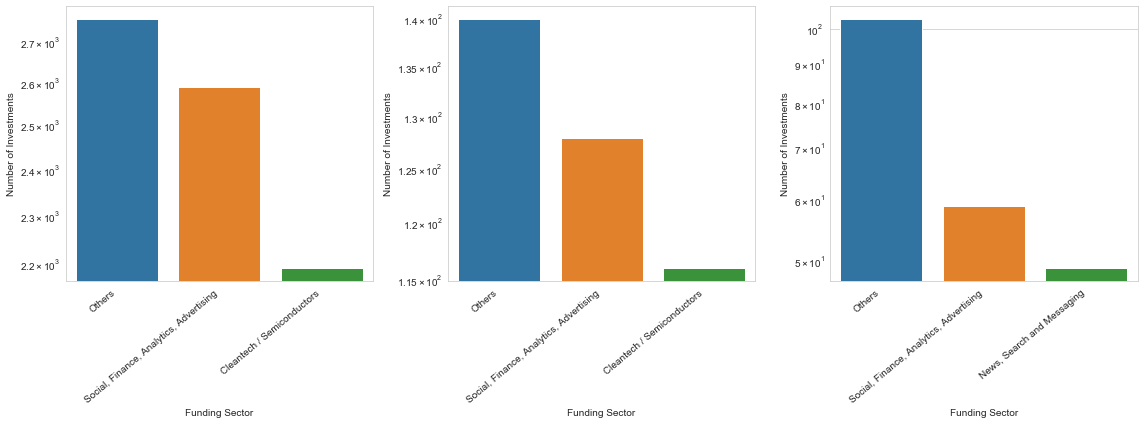

In [54]:
#Plot 6 -- Plot showing top 3 English speaking countries' top 3 investment sectors 
df1_count=df_country1.groupby('main_category',as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False).head(3)
df2_count=df_country2.groupby('main_category',as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False).head(3)
df3_count=df_country3.groupby('main_category',as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False).head(3)
plt.figure(figsize=(16, 6));
plt.subplot(1,3,1);
bp=sns.barplot(x='main_category', y='raised_amount_usd', data=df1_count);
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.ylabel("Number of Investments");
plt.xlabel("Funding Sector");
plt.yscale('log');
plt.tight_layout()
plt.subplot(1,3,2);
bp=sns.barplot(x='main_category', y='raised_amount_usd', data=df2_count);
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.ylabel("Number of Investments");
plt.xlabel("Funding Sector");
plt.yscale('log');
plt.tight_layout()
plt.subplot(1,3,3);
bp=sns.barplot(x='main_category', y='raised_amount_usd', data=df3_count);
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.ylabel("Number of Investments");
plt.xlabel("Funding Sector");
plt.yscale('log');
plt.tight_layout()
plt.show();